<a href="https://colab.research.google.com/github/Abinaya-S17/CodSoft/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from  sklearn.ensemble import RandomForestClassifier

In [ ]:
df_train = pd.read_csv('/content/fraudTrain.csv')
df_test = pd.read_csv('/content/fraudTest.csv')

In [ ]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0


In [ ]:
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [ ]:
df_train.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
35036,35036,2019-01-21 15:46:37,30270432095985,fraud_Schaefer Ltd,kids_pets,5.11,Lisa,Lin,F,908 Brooks Brook,...,40.6761,-91.0391,725,Environmental consultant,1972-11-28,6915c02a24d28580dff5f3730d064569,1327160797,40.019024,-91.682015,0.0
35037,35037,2019-01-21 15:46:45,213156747557083,fraud_Rau-Grant,kids_pets,45.26,Adam,Santos,M,725 Jo Trace Apt. 102,...,34.1556,-118.2322,172817,Advertising account planner,1982-07-30,1f9a6e9ed525a5eb5831035ac72dc73f,1327160805,34.028767,-118.410304,0.0
35038,35038,2019-01-21 15:47:20,4634955908138648,fraud_Ernser-Lynch,food_dining,102.31,Mackenzie,Smith,F,7178 Willis Drive,...,41.6414,-96.5232,1745,"Engineer, automotive",1973-12-26,ded55d57445155df6e8947712bd36d76,1327160840,42.031620,-96.094135,0.0
35039,35039,2019-01-21 15:47:24,36485887555770,"fraud_Fadel, Mertz and Rippin",entertainment,121.53,Michael,Gross,M,230 Ryan Tunnel Apt. 025,...,40.4971,-82.8342,267,Facilities manager,2005-01-29,af4a366a6272e3773aca62fed338621c,1327160844,40.171110,-83.627060,0.0
35040,35040,2019-01-21 15:47:36,4653879239169997,"fraud_Weimann, Kuhic and Beahan",shopping_pos,2.85,Monica,Tucker,F,302 Christina Islands,...,37.0581,-86.1938,6841,"Therapist, sports",1999-06-06,8ee3a01d20ed5f5031a1278e0c36f51e,1327160856,36.895618,-86.000000,NaN


In [ ]:
df_train.shape

(35041, 23)

In [ ]:
df_test.shape

(7798, 23)

In [ ]:
df_train.size

805943

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             35041 non-null  int64  
 1   trans_date_trans_time  35041 non-null  object 
 2   cc_num                 35041 non-null  int64  
 3   merchant               35041 non-null  object 
 4   category               35041 non-null  object 
 5   amt                    35041 non-null  float64
 6   first                  35041 non-null  object 
 7   last                   35041 non-null  object 
 8   gender                 35041 non-null  object 
 9   street                 35041 non-null  object 
 10  city                   35041 non-null  object 
 11  state                  35041 non-null  object 
 12  zip                    35041 non-null  int64  
 13  lat                    35041 non-null  float64
 14  long                   35041 non-null  float64
 15  ci

In [ ]:

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7798 entries, 0 to 7797
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7798 non-null   int64  
 1   trans_date_trans_time  7798 non-null   object 
 2   cc_num                 7798 non-null   int64  
 3   merchant               7798 non-null   object 
 4   category               7798 non-null   object 
 5   amt                    7798 non-null   float64
 6   first                  7798 non-null   object 
 7   last                   7798 non-null   object 
 8   gender                 7798 non-null   object 
 9   street                 7798 non-null   object 
 10  city                   7798 non-null   object 
 11  state                  7798 non-null   object 
 12  zip                    7798 non-null   int64  
 13  lat                    7798 non-null   float64
 14  long                   7798 non-null   float64
 15  city

In [ ]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,35041.000000,3.504100e+04,35041.000000,35041.000000,35041.000000,35041.000000,3.504100e+04,3.504100e+04,35041.000000,35041.000000,35040.000000
mean,17520.000000,4.159252e+17,72.123259,48710.723638,38.533692,-90.247950,8.905974e+04,1.326274e+09,38.533606,-90.250242,0.010074
std,10115.609728,1.307970e+18,145.818835,26986.586442,5.098212,13.927507,2.972282e+05,5.148735e+05,5.127883,13.943916,0.099865
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.629875,0.000000
25%,8760.000000,1.800429e+14,9.690000,25526.000000,34.668900,-96.809400,7.430000e+02,1.325863e+09,34.769786,-96.953602,0.000000
50%,17520.000000,3.519233e+15,48.170000,48088.000000,39.342600,-87.461600,2.471000e+03,1.326288e+09,39.335794,-87.409608,0.000000
75%,26280.000000,4.642255e+15,84.130000,72011.000000,41.846700,-80.128400,2.112500e+04,1.326666e+09,41.923253,-80.165046,0.000000
max,35040.000000,4.992346e+18,11872.210000,99783.000000,65.689900,-67.950300,2.906700e+06,1.327161e+09,66.659242,-66.967742,1.000000


In [ ]:

df_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,7798.000000,7.798000e+03,7798.000000,7798.000000,7798.000000,7798.000000,7.798000e+03,7.797000e+03,7797.000000,7797.000000,7797.000000
mean,3898.500000,4.045046e+17,68.658160,48467.937548,38.486395,-89.976821,9.835233e+04,1.371903e+09,38.467741,-89.975801,0.002822
std,2251.233033,1.293290e+18,122.077687,26765.475620,5.088719,13.600215,3.330378e+05,4.968043e+04,5.124246,13.621047,0.053047
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.163455,-166.464422,0.000000
25%,1949.250000,1.800462e+14,9.450000,26237.000000,34.509100,-96.601200,7.722500e+02,1.371858e+09,34.627939,-96.577261,0.000000
50%,3898.500000,3.518235e+15,46.345000,47987.000000,39.342600,-86.947500,2.691000e+03,1.371908e+09,39.320289,-87.193562,0.000000
75%,5847.750000,4.642255e+15,81.600000,72011.000000,42.015800,-80.175200,2.219100e+04,1.371941e+09,42.011157,-80.269768,0.000000
max,7797.000000,4.992346e+18,3204.980000,99783.000000,65.689900,-67.950300,2.906700e+06,1.371993e+09,65.951727,-67.122946,1.000000


In [ ]:
df_train.isnull().values.any()

True

In [ ]:
df_train = df_train.dropna()


In [ ]:
df_train.isnull().values.any()

False

In [ ]:
df_test = df_test.dropna()

In [ ]:
df_test.isnull().values.any()

False

In [ ]:
df_train.count()

,0
Unnamed: 0,35040
trans_date_trans_time,35040
cc_num,35040
merchant,35040
category,35040
amt,35040
first,35040
last,35040
gender,35040
street,35040


In [ ]:

df_test.count()

,0
Unnamed: 0,7797
trans_date_trans_time,7797
cc_num,7797
merchant,7797
category,7797
amt,7797
first,7797
last,7797
gender,7797
street,7797


In [ ]:
df_combined = pd.concat([df_train, df_test], axis = 0)

In [ ]:
df_combined.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
df_combined.shape
df_combined.size
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42837 entries, 0 to 7796
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             42837 non-null  int64  
 1   trans_date_trans_time  42837 non-null  object 
 2   cc_num                 42837 non-null  int64  
 3   merchant               42837 non-null  object 
 4   category               42837 non-null  object 
 5   amt                    42837 non-null  float64
 6   first                  42837 non-null  object 
 7   last                   42837 non-null  object 
 8   gender                 42837 non-null  object 
 9   street                 42837 non-null  object 
 10  city                   42837 non-null  object 
 11  state                  42837 non-null  object 
 12  zip                    42837 non-null  int64  
 13  lat                    42837 non-null  float64
 14  long                   42837 non-null  float64
 15  city_pop

In [ ]:
df_combined.drop(labels = ["first", "last", "job", "dob", "trans_num", "street", "trans_date_trans_time","city","state"], axis = 1, inplace = True)

In [ ]:
df_combined.head()

,Unnamed: 0,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,28654,36.0788,-81.1781,3495,1.325376e+09,36.011293,-82.048315,0.0
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160,48.8878,-118.2105,149,1.325376e+09,49.159047,-118.186462,0.0
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,83252,42.1808,-112.2620,4154,1.325376e+09,43.150704,-112.154481,0.0
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,59632,46.2306,-112.1138,1939,1.325376e+09,47.034331,-112.561071,0.0
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,24433,38.4207,-79.4629,99,1.325376e+09,38.674999,-78.632459,0.0


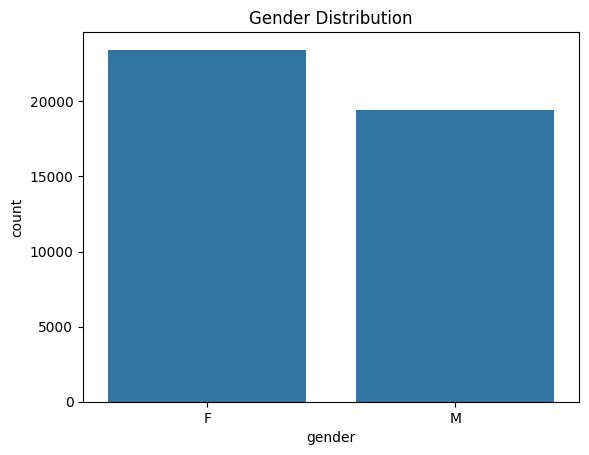

In [ ]:
sns.countplot(x='gender', data=df_combined)
plt.title("Gender Distribution")
plt.show()

In [ ]:
encoder = LabelEncoder()
new_col = encoder.fit_transform(df_combined["merchant"].values)
df_combined["merchant_new"] = new_col
df_combined.drop(labels = ["merchant"], axis = 1, inplace = True)

In [ ]:
encoder = LabelEncoder()
new_col1 = encoder.fit_transform(df_combined["category"].values)
df_combined["category_new"] = new_col1
df_combined.drop(labels = ["category"], axis = 1, inplace = True)

In [ ]:
df_combined = pd.get_dummies(df_combined)
df_combined.drop(labels=['gender_F'], axis = 1, inplace = True)

In [ ]:
df_combined.head()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merchant_new,category_new,gender_M
0,0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1.325376e+09,36.011293,-82.048315,0.0,514,8,False
1,1,630423337322,107.23,99160,48.8878,-118.2105,149,1.325376e+09,49.159047,-118.186462,0.0,241,4,False
2,2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1.325376e+09,43.150704,-112.154481,0.0,390,0,True
3,3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1.325376e+09,47.034331,-112.561071,0.0,360,2,True
4,4,375534208663984,41.96,24433,38.4207,-79.4629,99,1.325376e+09,38.674999,-78.632459,0.0,297,9,True


In [ ]:
X = df_combined.drop("is_fraud", axis = 1)
y = df_combined["is_fraud"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
lr_predictions = lr_model.predict(X_test)

In [ ]:
print("Logistic Regression Model: ")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))

Logistic Regression Model: 
[[8488    0]
 [  80    0]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      8488
         1.0       0.00      0.00      0.00        80

    accuracy                           0.99      8568
   macro avg       0.50      0.50      0.50      8568
weighted avg       0.98      0.99      0.99      8568

Accuracy:  0.9906629318394025


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Model: ")
print(confusion_matrix(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))
print("Accuracy: ", accuracy_score(y_test, dt_predictions))

Decision Tree Model: 
[[8457   31]
 [  18   62]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8488
         1.0       0.67      0.78      0.72        80

    accuracy                           0.99      8568
   macro avg       0.83      0.89      0.86      8568
weighted avg       0.99      0.99      0.99      8568

Accuracy:  0.994281045751634


In [ ]:

rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:

rf_predictions = rf_model.predict(X_test)
print("Random Forest Model: ")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))
print("Accuracy: ", accuracy_score(y_test, rf_predictions))

Random Forest Model: 
[[8484    4]
 [  19   61]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8488
         1.0       0.94      0.76      0.84        80

    accuracy                           1.00      8568
   macro avg       0.97      0.88      0.92      8568
weighted avg       1.00      1.00      1.00      8568

Accuracy:  0.9973155929038282
